# Data Cleaning and Analysis
(data source: themoviedb.org)
## 1. Import Libraries


In [198]:
import pandas as pd
import numpy as np
import ast # package is used for string conversion
import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 2. Defining Functions

In [3]:
## Converts string list("[1,2,3]") to list([1,2,3])
def string_list(string_):
    '''
    Function:
    Returns list.
    
    Parameters:
    string_: string of list, e.g. "[1,2,3]" 

    '''
    list_= ast.literal_eval(string_)
    return list_


In [4]:
## Extracts from list of dictionaries, only interested values.
## see function docstring for details.
def values_list(list_dict, target_elem=-1):
    '''
    Function:
    Returns the list of values(values of target_elem) from list of dictionaries(list_dict).
    
    Parameters:
    list_dict: (type-list). List of dictionaries or empty dictionary.
    
    target_elem: (type integer). Number of the element (in this case, element is the dictionary)
    in the list.

    '''
    if list_dict == []:
        return list_dict
    else:
        list_ = list(map(lambda x: list(x.values())[target_elem], list_dict))
        return list_

In [222]:
## This function will be used to flatten the list of lists.
## It will return list of elements.

def flat_list(list_):
    
    '''
    Function:
    Returns flat list from the list of lists.
    
    Parameters:
    list_: list of lists 
    '''
    return [item for sublist in list_ for item in sublist]

In [268]:
## Returns transformed list of lists(each element here is cloned
## number of times per correcponding number_list_)

def transform_list(list_, number_list_):
    '''
    Function:
    Returns transformed list of lists(each element here is cloned
    number of times per correcponding number_list_)
    
    Parameters:
    list_: list of numbers
    number_list_: list of numbers
    '''
    transformed_list = []
    for i, j in enumerate(number_list_):
        transformed_elem = list_[i]
        transformed = [transformed_elem] * j
        transformed_list.append(transformed)
    return transformed_list

## 3. Exploring and Cleaning the data

In [71]:
# Read csv file to data frame
df = pd.read_csv("./raw_csv_files/df_movies.csv")

In [72]:
# See few head and tail rows
df.head(3).append(df.tail(3))

,Unnamed: 0,Unnamed: 0.1,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,0,3314,False,NaN,NaN,0.0,"[{'id': 28, 'name': 'Action'}]",NaN,508950.0,NaN,...,2022-07-29,0.0,NaN,"[{'iso_639_1': 'en', 'name': 'English'}]",Planned,NaN,Untitled Marvel Project (3),False,0.0,0.0
1,1,929,False,/41RgPQeAvDaJ1Msiok96chq2gnd.jpg,NaN,125000000.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,412656.0,tt2076822,...,2021-01-21,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Post Production,NaN,Chaos Walking,False,0.0,0.0
2,2,2006,False,NaN,NaN,0.0,[],NaN,607259.0,tt4733624,...,2021-01-06,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Post Production,NaN,Fatherhood,False,0.0,0.0
6740,4484,4484,False,/o3505VxhHKHbfTmuNif1ukjXDxI.jpg,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",http://www.whatisthecircle.com,335866.0,tt3118452,...,2015-05-28,0.0,87.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,In here… everything gets you killed.,Circle,False,6.0,970.0
6741,4485,4485,False,/7CuXAFUWcOlR5kt07ln1fZDxdHX.jpg,NaN,70000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",NaN,73723.0,tt1482459,...,2012-03-01,348840316.0,86.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Meet The Original Force Of Nature,The Lorax,False,6.4,2063.0
6742,4486,4486,False,/8nyR0ffpbTDg9qN6FSscky0s2z.jpg,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,425980.0,tt5884230,...,2017-09-14,2400000.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Brad's Status,False,6.1,194.0


In [73]:
# get overview of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6743 entries, 0 to 6742
Data columns (total 27 columns):
Unnamed: 0               6743 non-null int64
Unnamed: 0.1             6743 non-null int64
adult                    6742 non-null object
backdrop_path            6607 non-null object
belongs_to_collection    1281 non-null object
budget                   6742 non-null float64
genres                   6742 non-null object
homepage                 3118 non-null object
id                       6742 non-null float64
imdb_id                  6716 non-null object
original_language        6742 non-null object
original_title           6742 non-null object
overview                 6740 non-null object
popularity               6742 non-null float64
poster_path              6684 non-null object
production_companies     6742 non-null object
production_countries     6742 non-null object
release_date             6742 non-null object
revenue                  6742 non-null float64
runtime          

In [74]:
# Get the columns name
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'adult', 'backdrop_path',
       'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

### 3a. Dropping the columns that will not be used in the analysis.

In [75]:
# Checking what is in 'overview' column.
# 'overview' column will be dropped, as this information will not 
# be used in the current analysis. 
df['overview'][11]

"On a post-apocalyptic Earth, a robot, built to protect the life of his dying creator's beloved dog, learns about life, love, friendship, and what it means to be human."

In [76]:
# Checking what is in 'Poster_path' column.
# It will be dropped, not usefull for the current analysis.
df['poster_path'][11:15]

11                                 NaN
12    /pYo2mEkSptAmW4OY5xduaHlLrh1.jpg
13    /gvYz6xkBvDYmEmcs0LdWN3euxsz.jpg
14                                 NaN
Name: poster_path, dtype: object

In [77]:
# Checking what is in these columns.
# They will be dropped, as not usefull for the current analysis.
df[['tagline', 'video']][11:15]

,tagline,video
11,NaN,False
12,An ORC-tastic journey of ELVISH proportions,False
13,NaN,False
14,NaN,False


In [78]:
# dropping columns that not going to be used in this project
df.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1', 'adult', 'imdb_id','backdrop_path','belongs_to_collection','homepage', 'overview', 'poster_path','tagline','video'], inplace= True)

In [79]:
# check that columns are dropped
df.shape

(6743, 16)

In [80]:
# check that columns are dropped
df.columns

Index(['budget', 'genres', 'id', 'original_language', 'original_title',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'title', 'vote_average', 'vote_count'],
      dtype='object')

### 3b. Dealing with NaN  and 0 values

In [81]:
# Nan values
df.isna().sum()

budget                   1
genres                   1
id                       1
original_language        1
original_title           1
popularity               1
production_companies     1
production_countries     1
release_date             1
revenue                  1
runtime                 33
spoken_languages         1
status                   1
title                    1
vote_average             1
vote_count               1
dtype: int64

In [82]:
# Check the runtime mean, median, and variation. Without including 0 values.
df['runtime'].loc[df['runtime']!=0].agg(['mean','median','std'])

mean      99.616320
median    98.000000
std       21.622115
Name: runtime, dtype: float64

In [83]:
# Instead of dropping rows with NaN 'runtime' values,
# replace with median. (mean and median have close values)
df['runtime'].fillna(inplace = True, value = df['runtime'].loc[df['runtime']!=0].median())

In [84]:
# Check again the runtime mean, median, and variation.
df['runtime'].loc[df['runtime']!=0].agg(['mean','median','std'])

# mean and variation not changed much. Ok to proceed.

mean      99.608255
median    98.000000
std       21.568399
Name: runtime, dtype: float64

In [85]:
# drop remaining NA values, as the amount is 1 in each colummn only.
df.dropna(inplace=True)
df.shape

(6742, 16)

In [86]:
# check if no NaN values left
df.isna().sum()

budget                  0
genres                  0
id                      0
original_language       0
original_title          0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
dtype: int64

In [87]:
# count the number of movies with runtime data missing
df.loc[df['runtime']==0].shape

(129, 16)

In [88]:
# Instead of dropping rows with NaN 'runtime' values,
# replace with median. (mean and median have close values)
df['runtime'].replace(to_replace = 0, value = df['runtime'].loc[df['runtime']!=0].median(),
                     inplace = True)

In [89]:
# confirm no 0 values in runtime
df.loc[df['runtime']==0].shape

(0, 16)

In [90]:
# check again runtime values
df['runtime'].agg(['mean','median','std'])
# mean and variation not changed much. Ok to proceed.

mean      99.577722
median    98.000000
std       21.363772
Name: runtime, dtype: float64

#### For this project, we need values with non-zero revenues. Lets explore the 'status' of movies column and 'revenue'

In [91]:
# count the number of movies with revenue data missing(0 values)
df['revenue'].value_counts()

0.0            3334
10000000.0        3
102000000.0       3
21.0              2
2400000.0         2
               ... 
47536959.0        1
12000000.0        1
261465.0          1
123384128.0       1
56359980.0        1
Name: revenue, Length: 3391, dtype: int64

In [92]:
# About half of the movies do not have revenue values. 
# Even so, it is a very big proportion of the data, 0 values will be dropped 
# as we need non zero values for the financial analysis (like comparing revenue 
# with budget, etc)

df = df.loc[df['revenue']!=0]

In [93]:
# confirm that revenue has no 0 values
df['revenue'].value_counts()

10000000.0     3
102000000.0    3
4500000.0      2
24000000.0     2
6700000.0      2
              ..
743559607.0    1
3430018.0      1
163403799.0    1
23507567.0     1
7.0            1
Name: revenue, Length: 3390, dtype: int64

In [94]:
# check 0 values for budget
df['budget'].value_counts(ascending=True)

3800000.0        1
220000000.0      1
4798235.0        1
163000000.0      1
3700000.0        1
              ... 
40000000.0     109
25000000.0     116
30000000.0     123
20000000.0     130
0.0            592
Name: budget, Length: 335, dtype: int64

In [103]:
# check how much of the data has revenue > 50,0000,000 and missing budget.
# As it is significant amount of movies with 'medium' amount of revenue. 
# 0 budget rows will not be dropped, as it is planned to investigate revenue vs genres.
# NOTE: for (revenue - budget), 0 budget will not be used.

df.loc[(df['budget']==0) & (df['revenue']>5000000)].shape

(193, 16)

In [104]:
# cleaning the 'genres' column and convert from string object to list of genres
# Use defined function: string_list()
df['genres'] = df['genres'].apply(lambda x: values_list(string_list(x), target_elem=-1))

In [110]:
# test random row
df.genres[30]

['Horror', 'Science Fiction', 'Thriller']

In [111]:
# cleaning the 'spoken_languages' column and convert from string object to list of spoken_languages
df['spoken_languages'] = df['spoken_languages'].apply(lambda x: values_list(string_list(x), target_elem = 0))

In [112]:
# cleaning the 'production_companies' column and convert from string object to list of production_companies
df['production_companies'] = df['production_companies'].apply(lambda x: values_list(string_list(x), target_elem = 2))

In [113]:
# cleaning the 'production_countries' column and convert from string object to list of production_countries
df['production_countries'] = df['production_countries'].apply(lambda x: values_list(string_list(x), target_elem = 0))

In [115]:
# Check if 'status' column can be dropped
df['status'].value_counts()

Released    3408
Name: status, dtype: int64

In [116]:
# Status column will be dropped. All movies left are released.

df.drop(columns=['status'], inplace = True)

In [119]:
# confirm if the data frame values are changed as expected
# Lets also reset index
df.reset_index(inplace = True)
df.drop(columns = ['index'], inplace = True)
df.head(3)

,budget,genres,id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
0,50000000.0,"[Horror, Science Fiction, Thriller]",443791.0,en,Underwater,16.698,"[Chernin Entertainment, 20th Century Fox, TSG ...",[US],2020-01-08,33617430.0,95.0,[en],Underwater,6.0,223.0
1,0.0,"[Drama, Adventure, Thriller]",400090.0,en,The Nightingale,9.743,"[Bron Studios, Causeway Films, Made Up Stories...",[AU],2019-08-02,800448.0,136.0,"[en, ga]",The Nightingale,7.4,131.0
2,0.0,[Comedy],440762.0,en,Jay and Silent Bob Reboot,26.096,"[SModcast Pictures, View Askew Productions, Mi...",[US],2019-10-15,1011305.0,95.0,"[en, de, it]",Jay and Silent Bob Reboot,6.1,99.0


In [120]:
# lets replace release date with released year

# convert release_date to 'datetime' type
df['release_date'] = pd.to_datetime(df.release_date) 

# replace a column with years values only
df['release_date'] = df.release_date.dt.year

In [124]:
# confirm released_date column changed
df['release_date'].head(3)

0    2020
1    2019
2    2019
Name: release_date, dtype: int64

In [128]:
# check if any missing values for vote
(df.vote_average==0).sum()

0

In [130]:
# check if any missing values for populaity
# populairity is complex metric per tmbd.org description
# https://developers.themoviedb.org/3/getting-started/popularity

(df.popularity==0).sum()

0

In [132]:
# explore vote_count values
df.vote_count.value_counts()

131.0     9
139.0     9
140.0     8
142.0     8
113.0     8
         ..
3457.0    1
2295.0    1
3931.0    1
4191.0    1
3271.0    1
Name: vote_count, Length: 2031, dtype: int64

#### Check for value counts for some columns:  genres, original_language, production_companies, production_countries, spoken_languages

In [138]:
# This column can be dropped.
# 0riginal_language is the same for all movies(English)
df.original_language.value_counts()

en    3408
Name: original_language, dtype: int64

In [170]:
# In addition the following columns will be dropped as they will not be used in the analysis:
# production_countries,spoken_languages. But we will use production_companies for the analysis.

df.drop(columns = ['original_language', 'spoken_languages', 'production_countries'], inplace= True)


In [175]:
# Confirming that columns dropped
df.columns

Index(['budget', 'genres', 'id', 'original_title', 'popularity',
       'production_companies', 'release_date', 'revenue', 'runtime', 'title',
       'vote_average', 'vote_count'],
      dtype='object')

In [176]:
# creating csv files
# uncomment below only if changes are made:

df.to_csv('df_cleaned.csv',index=False)

## 4. Data Analysis


### Analysis of data frame (for years 2000 - 2019)

In [357]:
# getting only release year 2000 till 2019
df = df.loc[(df['release_date']>=2000)&(df['release_date']<=2019)]
df.shape

(3393, 12)

In [194]:
df.columns

Index(['budget', 'genres', 'id', 'original_title', 'popularity',
       'production_companies', 'release_date', 'revenue', 'runtime', 'title',
       'vote_average', 'vote_count'],
      dtype='object')

### Checking for revenue and income=(revenue-budget) vs genres

In [207]:
# Each element in the genres column is the list of genres.
df['genres'].head()

1    [Drama, Adventure, Thriller]
2                        [Comedy]
3                        [Comedy]
4             [Adventure, Family]
5      [Thriller, Drama, Mystery]
Name: genres, dtype: object

In [243]:
# lets calculate the length of each list
number_of_genres = df['genres'].map(lambda x: len(x))

In [244]:
# convert to list
number_of_genres = number_of_genres.to_list()

In [245]:
# test if it worked correctly
number_of_genres[:5]

[3, 1, 1, 2, 3]

In [219]:
# Because we have multiple genres for each movie.
# The revenue and budget values will be divided by number of genres 
# This will get normalized values(revenue, budget) per genre in each movie

# Now create new list with genres unstacked
genres_list = df['genres'].to_list()
genres_list[:5]


[['Drama', 'Adventure', 'Thriller'],
 ['Comedy'],
 ['Comedy'],
 ['Adventure', 'Family'],
 ['Thriller', 'Drama', 'Mystery']]

In [220]:
# now remove sublists in genres_list
genres_list = flat_list(genres_list)
len(genres_list)

8784

In [221]:
# test if flat list is correct in length
len(genres_list) == number_of_genres.sum()

True

In [259]:
# reset index
df.reset_index(inplace = True)
df.drop(columns = ['index'], inplace = True)

In [260]:
df.index

RangeIndex(start=0, stop=3393, step=1)

In [261]:
df.revenue[:5]

0    8.004480e+05
1    1.011305e+06
2    2.484903e+07
3    1.656943e+09
4    2.572430e+07
Name: revenue, dtype: float64

In [249]:
number_of_genres[:5]

[3, 1, 1, 2, 3]

In [267]:
len(number_of_genres)

3393

In [264]:
transform_list

0    8.004480e+05
1    1.011305e+06
2    2.484903e+07
3    1.656943e+09
4    2.572430e+07
Name: revenue, dtype: float64

In [275]:
# transform revenue list to make it the same length as genres_list
revenue_list_extended = flat_list(transform_list(df.revenue, number_of_genres))

In [328]:
len(revenue_list_extended)==len(genres_list)

True

In [333]:
# create data frame to plot genres vs revenue
df_plot_1 = pd.DataFrame(columns = ['genres', 'revenue'])

In [335]:
df_plot_1['genres'] = genres_list
df_plot_1['revenue'] = revenue_list_extended

In [349]:
df_plot_1 = df_plot_1.groupby('genres').sum()
df_plot_1.reset_index(inplace = True)
df_plot_1.sort_values(by='revenue', ascending=False, inplace = True)

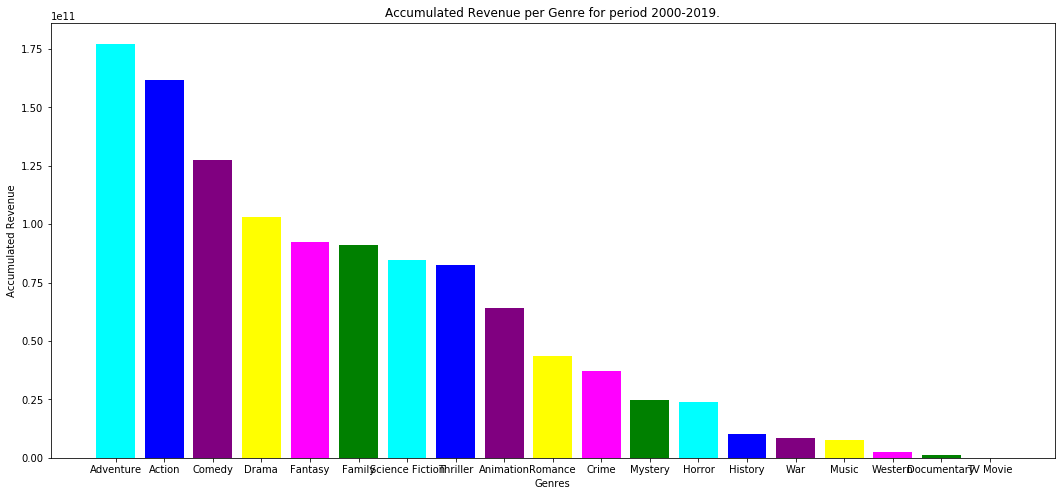

In [390]:
plt.figure(figsize=(18,8))
plt.bar(df_plot_1['genres'],df_plot_1['revenue'], 
        color=['cyan','blue','purple','yellow','magenta','green'])

plt.title("Accumulated Revenue per Genre for period 2000-2019.")
plt.xlabel('Genres')
plt.ylabel('Accumulated Revenue')
plt.savefig('Revenue_per_Genre.png', dpi=400)
plt.show()

In [360]:
# fo this nalysis we drop 0 budget rows
df_plot_2 = df.loc[df['budget']!=0]
df_plot_2.shape

(2803, 12)

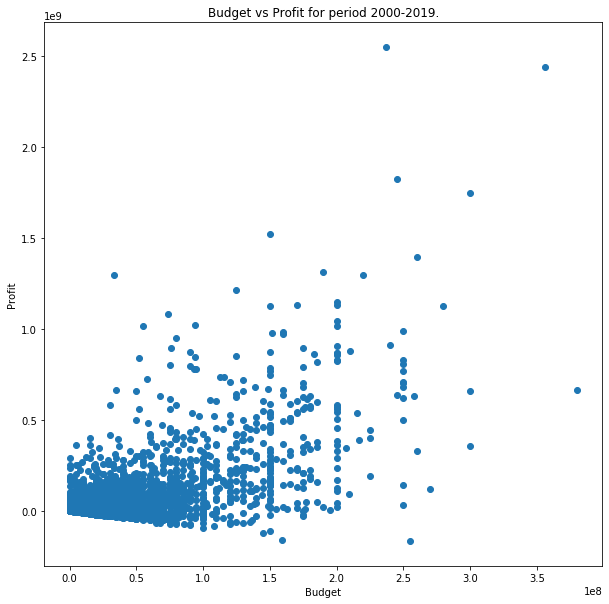

In [394]:
plt.figure(figsize=(10,10))

plt.scatter(x=df['budget'], y = df['revenue']-df['budget'])

plt.title("Budget vs Profit for period 2000-2019.")
plt.xlabel('Budget')
plt.ylabel('Profit')
plt.savefig('Budget_vs_Profit.png', dpi=400)
plt.show()

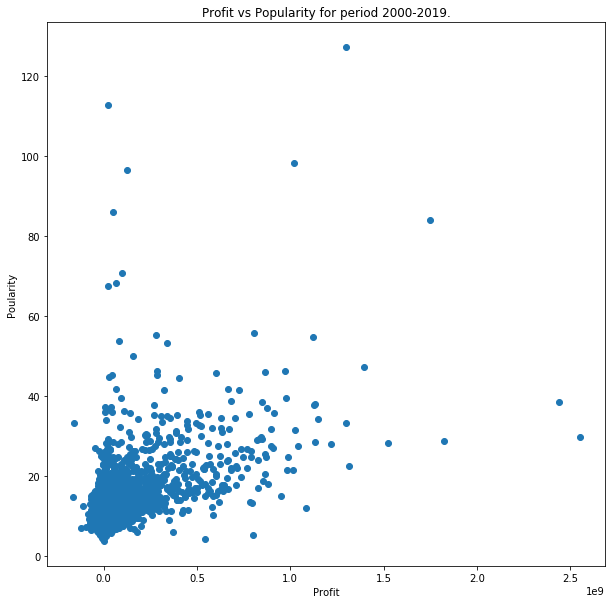

In [395]:
plt.figure(figsize=(10,10))

plt.scatter(x=df['revenue']-df['budget'], y = df['popularity'])

plt.title("Profit vs Popularity for period 2000-2019.")
plt.xlabel('Profit')
plt.ylabel('Poularity')
plt.savefig('Popularity.png', dpi=400)
plt.show()

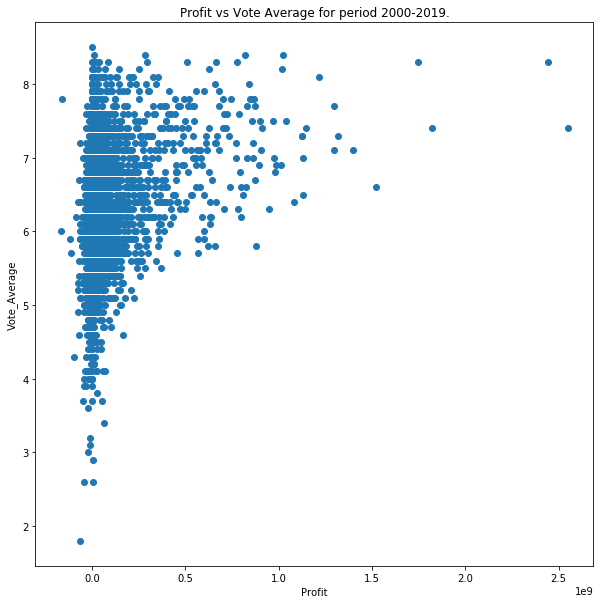

In [396]:
plt.figure(figsize=(10,10))

plt.scatter(x=df['revenue']-df['budget'], y = df['vote_average'])

plt.title("Profit vs Vote Average for period 2000-2019.")
plt.xlabel('Profit')
plt.ylabel('Vote_Average')
plt.show()